In [84]:
# calibration with data collected during 2002-2003 in marrakech / Field C3

import sys, os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
data_dir = os.path.join(os.getcwd(), "C3")
import pcse
cropfile = os.path.join(data_dir, 'C3.crop')
from pcse.fileinput import CABOFileReader
cropdata = CABOFileReader(cropfile)
soilfile = os.path.join(data_dir, 'MO4.soil')
soildata = CABOFileReader(soilfile)
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV=15, CO2=360)
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'C3_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
from pcse.fileinput import ExcelWeatherDataProvider
wdp = ExcelWeatherDataProvider('Climat_2002-2003.xlsx')
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pcse/fileinput/yaml_agro_loader.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  r = yaml.load(fp)


,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW,EVW,EVS,TSUM,TSUM1
day,,,,,,,,,,,,,,,
2003-05-24,1.889427,0.204847,4212.936195,899.760832,1141.168922,2172.006441,506.1635,0.006288,55.0,0.177710,24.174052,0.0,0.052662,1317.615,None
2003-05-25,1.918858,0.127453,4212.936195,899.760832,1141.168922,2172.006441,506.1635,0.003321,55.0,0.176638,24.115102,0.0,0.051909,1335.715,None
2003-05-26,1.943427,0.070252,4212.936195,899.760832,1141.168922,2172.006441,506.1635,0.001685,55.0,0.175634,24.059873,0.0,0.057936,1350.825,None
2003-05-27,1.971825,0.050552,4212.936195,899.760832,1141.168922,2172.006441,506.1635,0.000999,55.0,0.174550,24.000252,0.0,0.057155,1368.290,None
2003-05-28,2.000000,0.018347,4212.936195,899.760832,1141.168922,2172.006441,506.1635,0.000298,55.0,0.173493,23.942098,0.0,0.065614,1390.470,None


In [85]:
wofsim.get_summary_output()

[{'DVS': 2.0,
  'LAIMAX': 2.5502212753027163,
  'TAGP': 4212.936195486597,
  'TWSO': 899.7608323678769,
  'TWLV': 1141.1689220666703,
  'TWST': 2172.00644105205,
  'TWRT': 506.16349986144746,
  'CTRAT': 18.8489344835119,
  'RD': 55.0,
  'DOS': datetime.date(2003, 1, 14),
  'DOE': datetime.date(2003, 1, 27),
  'DOA': datetime.date(2003, 4, 19),
  'DOM': datetime.date(2003, 5, 28),
  'DOH': None,
  'DOV': None}]

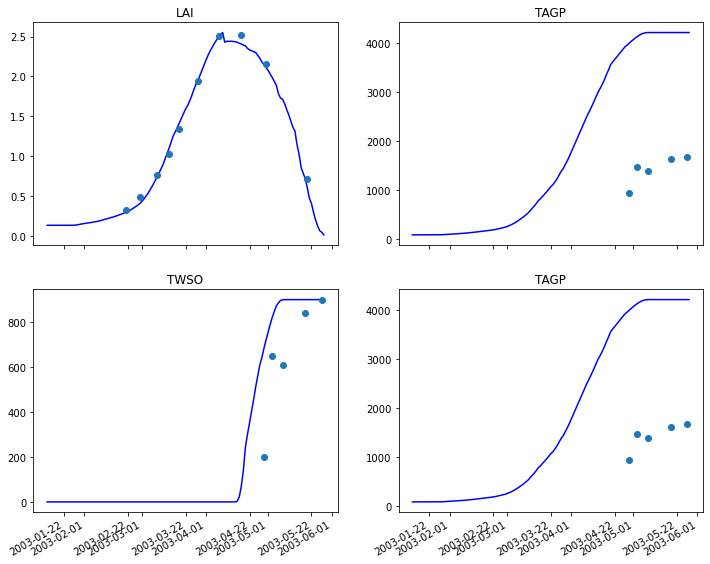

In [86]:
output = wofsim.get_output()
df = pd.DataFrame(output)
df.to_excel("wwh107_C3s.xls")

sortie_C3 = pd.read_excel('/Users/mac/LAI_TAGP_TWSO_2002_2003.xlsx' , sheet_name="C3") 
result = sortie_C3.set_index("day")
# result

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["LAI", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
for var, ax in zip(["LAI", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(result.index, result[var])
    ax.set_title(var)
fig.autofmt_xdate()

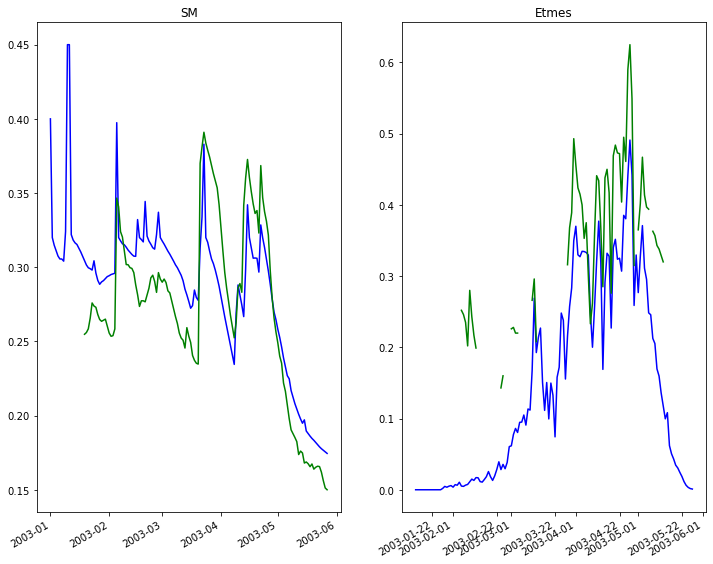

In [82]:
sortie_SM = pd.read_excel('/Users/mac/Soil Moisture Field C1_C2_C3.xlsx', sheet_name="F1-2002-2003_C3") 
result_SM = sortie_SM.set_index("day")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10))
for var, ax in zip(["SM", "TRA"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
for var, ax in zip(["SM", "Etmes"], axes.flatten()):
    ax.plot_date(result_SM.index, result_SM[var], 'g-')
    ax.set_title(var)
fig.autofmt_xdate()